Predicting the gold price using random forest regressor

Import the dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# data collection and preprocessing
gold_dataset = pd.read_csv("/content/drive/MyDrive/self_projects/gold_price/gld_price_data.csv")
gold_dataset.head() # printing the first 5 rows

Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

In [4]:
# printing the last 5 rows
gold_dataset.tail()

Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033

In [5]:
# printing the rows and columns
gold_dataset.shape

(2290, 6)

In [6]:
# summary statistics
gold_dataset.describe()

SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798

In [15]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking number of null values
gold_dataset.isnull().sum() # if there is null then imputation needs to be done

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Find out the correlation
1. Positive correlation
2. Negative correlation

In [11]:
correlation = gold_dataset.drop("Date", axis = 1).corr()

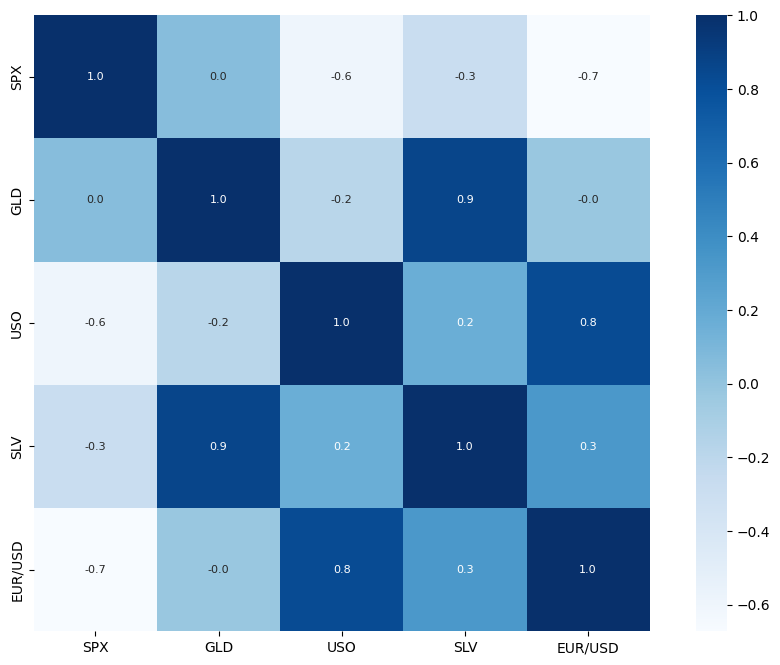

In [13]:
# generating a heatmap
plt.figure(figsize = (12,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws = {"size":8}, cmap = "Blues");

In [14]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


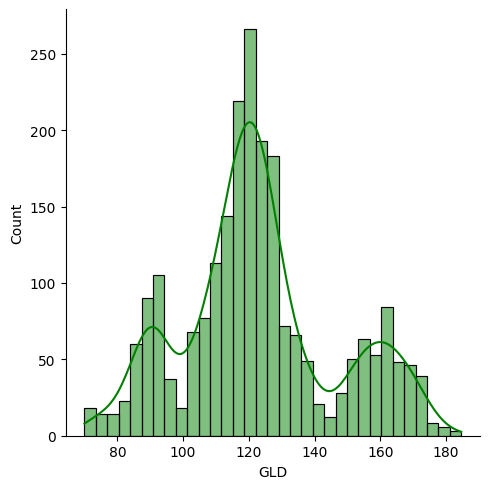

In [20]:
sns.displot(gold_dataset["GLD"], color = "green", kde = True);
# distplot is deprecated so displot is being used
# there are some bumps at around GLD=100 and GLD=140, data is highly concentrated between 100 and 140, beyond 80 and 180 lies the outliers

Splitting the data

In [22]:
X = gold_dataset.drop(["Date","GLD"], axis=1)
y = gold_dataset["GLD"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [70]:
X.shape, X_train.shape, X_test.shape

((2290, 4), (1832, 4), (458, 4))

In [71]:
y.shape, y_train.shape, y_test.shape

((2290,), (1832,), (458,))

Model training: Random Forest Regressor

In [72]:
regressor = RandomForestRegressor(n_estimators = 100) # n_estimators represents number of decsion trees

In [73]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
# predicting the model
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [75]:
# r2_score measurement (training data)
error_score = metrics.r2_score(y_train, y_pred_train)
print(f"r2_score = {error_score}") # the value is quite high - chances of overfitting is high

r2_score = 0.9983880303704066


In [76]:
# r2_score measurement (testing data)
error_score = metrics.r2_score(y_test, y_pred_test)
print(f"r2_score = {error_score}") # the value is quite high - represent a good model

r2_score = 0.9895378874088006


In [77]:
y_test = y_test.tolist()
y_pred_test = y_pred_test.tolist()

Predicted vs Actual


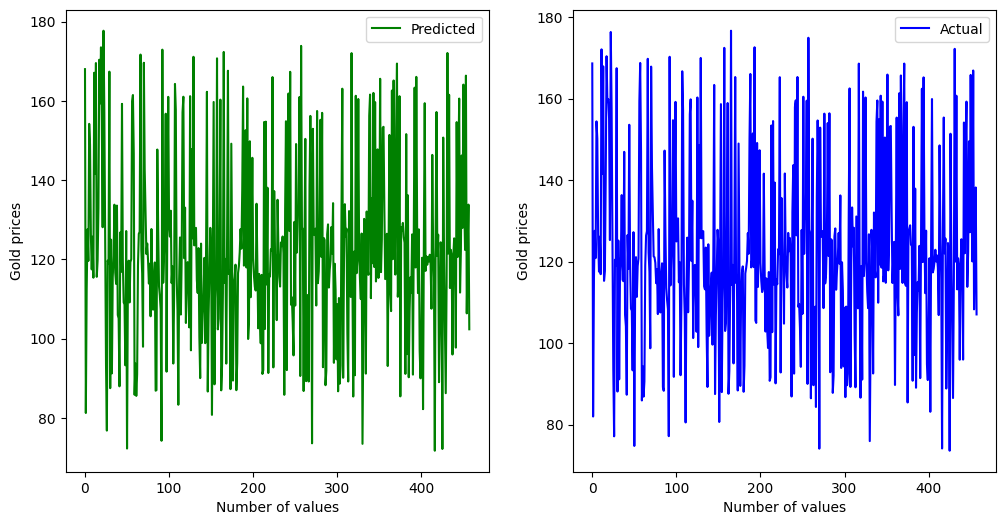

In [78]:
print("Predicted vs Actual")
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
axs[0].plot(y_test,color = "green", label = "Predicted")
axs[0].set_xlabel("Number of values")
axs[0].set_ylabel("Gold prices")
axs[0].legend()

axs[1].plot(y_pred_test, color = "blue", label = "Actual")
axs[1].set_xlabel("Number of values")
axs[1].set_ylabel("Gold prices")
axs[1].legend()

plt.show()
